In [10]:
from pathlib import Path
from src import metrics
from src import hierarchy
import tqdm
import matplotlib.pyplot as plt

`metrics.pkl` contains the metric values from the pre-computed sweeps.

In [11]:
import pickle as pkl


def load_metrics():
    with open("metrics.pkl", "rb") as file:
        metrics = pkl.load(file)
    return metrics

metric_values = load_metrics()

# The format is:
# metric_values[model_name: str][classifier_name: str][metric_name: str] = average_metric: float

In [12]:
pretty_names = {
    "glide": "GLIDE",
    "ldm": "LDM",
    "sd14": "SD v1.4",
    "sd20": "SD v2.0",
    "unclip": "unCLIP",
}

marker_style = {
    "glide": "*-",
    "ldm": "o-",
    "sd14": "s-",
    "sd20": "s--",
    "unclip": "^-",
}

## Guidance sweep

(figure 2)

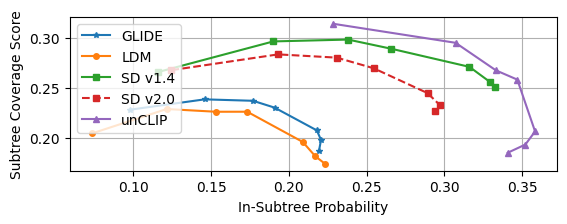

In [13]:
plt.figure(figsize=(5.5, 2))
plt.grid()

for k in ["glide", "ldm", "sd14", "sd20", "unclip"]:
    subtree_in = []
    subtree_is = []

    for g in [10, 15, 20, 25, 50, 75, 100]:
        name = f"{k}_{g}"
        subtree_in.append(metric_values[name]["vit_b_16"]["subtree_in_prob_32"])
        subtree_is.append(metric_values[name]["vit_b_16"]["subtree_is"] / 1.6236960327744612)
    
    plt.plot(subtree_in, subtree_is, marker_style[k], label=pretty_names[k], markersize=4)

plt.legend()

plt.xlabel("In-Subtree Probability")
plt.ylabel("Subtree Coverage Score")

plt.tight_layout(pad=0.1, h_pad=1.08, w_pad=1.08)
plt.show()

## Number of diffusion steps sweep 

(figure 3)

In [18]:
nfes = [5, 10, 15, 25, 50, 75, 100]

isps = {}
scss = {}

for model in ["sd14", "ldm"]:
    isps[model] = [metric_values[f"{model}_{'n' + str(i) if i != 50 else '75'}"]['vit_b_16']['subtree_in_prob_32'] for i in nfes]
    scss[model] = [metric_values[f"{model}_{'n' + str(i) if i != 50 else '75'}"]['vit_b_16']['subtree_is'] for i in nfes]

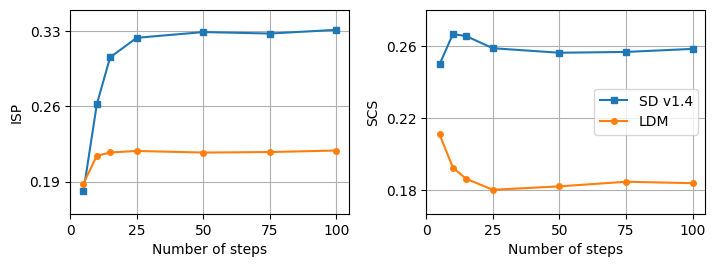

In [19]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(7, 2.5))

plt.subplot(1, 2, 1)
plt.gca().grid("on")

for k, v in isps.items():
    plt.plot(nfes, v, marker_style[k], label=pretty_names[k], markersize=4)

plt.xlabel("Number of steps")
plt.ylabel("ISP")
plt.xticks([i for i in range(0, 101, 25)])
plt.yticks([0.19, 0.26, 0.33])
plt.ylim(0.16, 0.35)
    
plt.subplot(1, 2, 2)
plt.gca().grid("on")

for k, v in scss.items():
    plt.plot(nfes, np.array(v) / 1.6236960327744612, marker_style[k], label=pretty_names[k], markersize=4)

plt.legend()
plt.xlabel("Number of steps")
plt.ylabel("SCS")
plt.xticks([i for i in range(0, 101, 25)])
plt.yticks([0.18, 0.22, 0.26])
plt.ylim(0.167, 0.28)

# plt.show()
plt.tight_layout(pad=0.1, h_pad=1.08, w_pad=1.08)